IMPORTING DATA

In [ ]:
#Uploading csv file
from google.colab import files

uploaded = files.upload()

Saving pd_features.csv to pd_features.csv


In [ ]:
#Reading the data
import pandas as pd
import numpy as np

source = pd.read_csv('pd_features.csv')

#Set the 1st row as the columns' label
dt = pd.DataFrame(source)
columns = np.array(dt.iloc[0])
data = pd.DataFrame(dt.values[1:], columns=columns)

display(data.head())
display(data.shape)
display(data.info())

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
4,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


(756, 755)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: object(755)
memory usage: 4.4+ MB


None

In [ ]:
#Convert object data type to numeric
data = data.apply(pd.to_numeric, errors='coerce')

#Check all data types after conversion
pd.set_option('display.max_rows', 10)
display(data.dtypes)

id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object

TRAIN/TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

fitur = data.drop('class', axis=1)  
target = data['class'] 
X_train, X_test, y_train, y_test = train_test_split(fitur, target, test_size=0.50, random_state = 2020, stratify=target)

DATA SCALING (DATA STANDARDIZATION)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)

FIT TO BASELINE RANDOM FOREST MODEL

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
display(rfc.score(X_train_scaled, y_train))

1.0

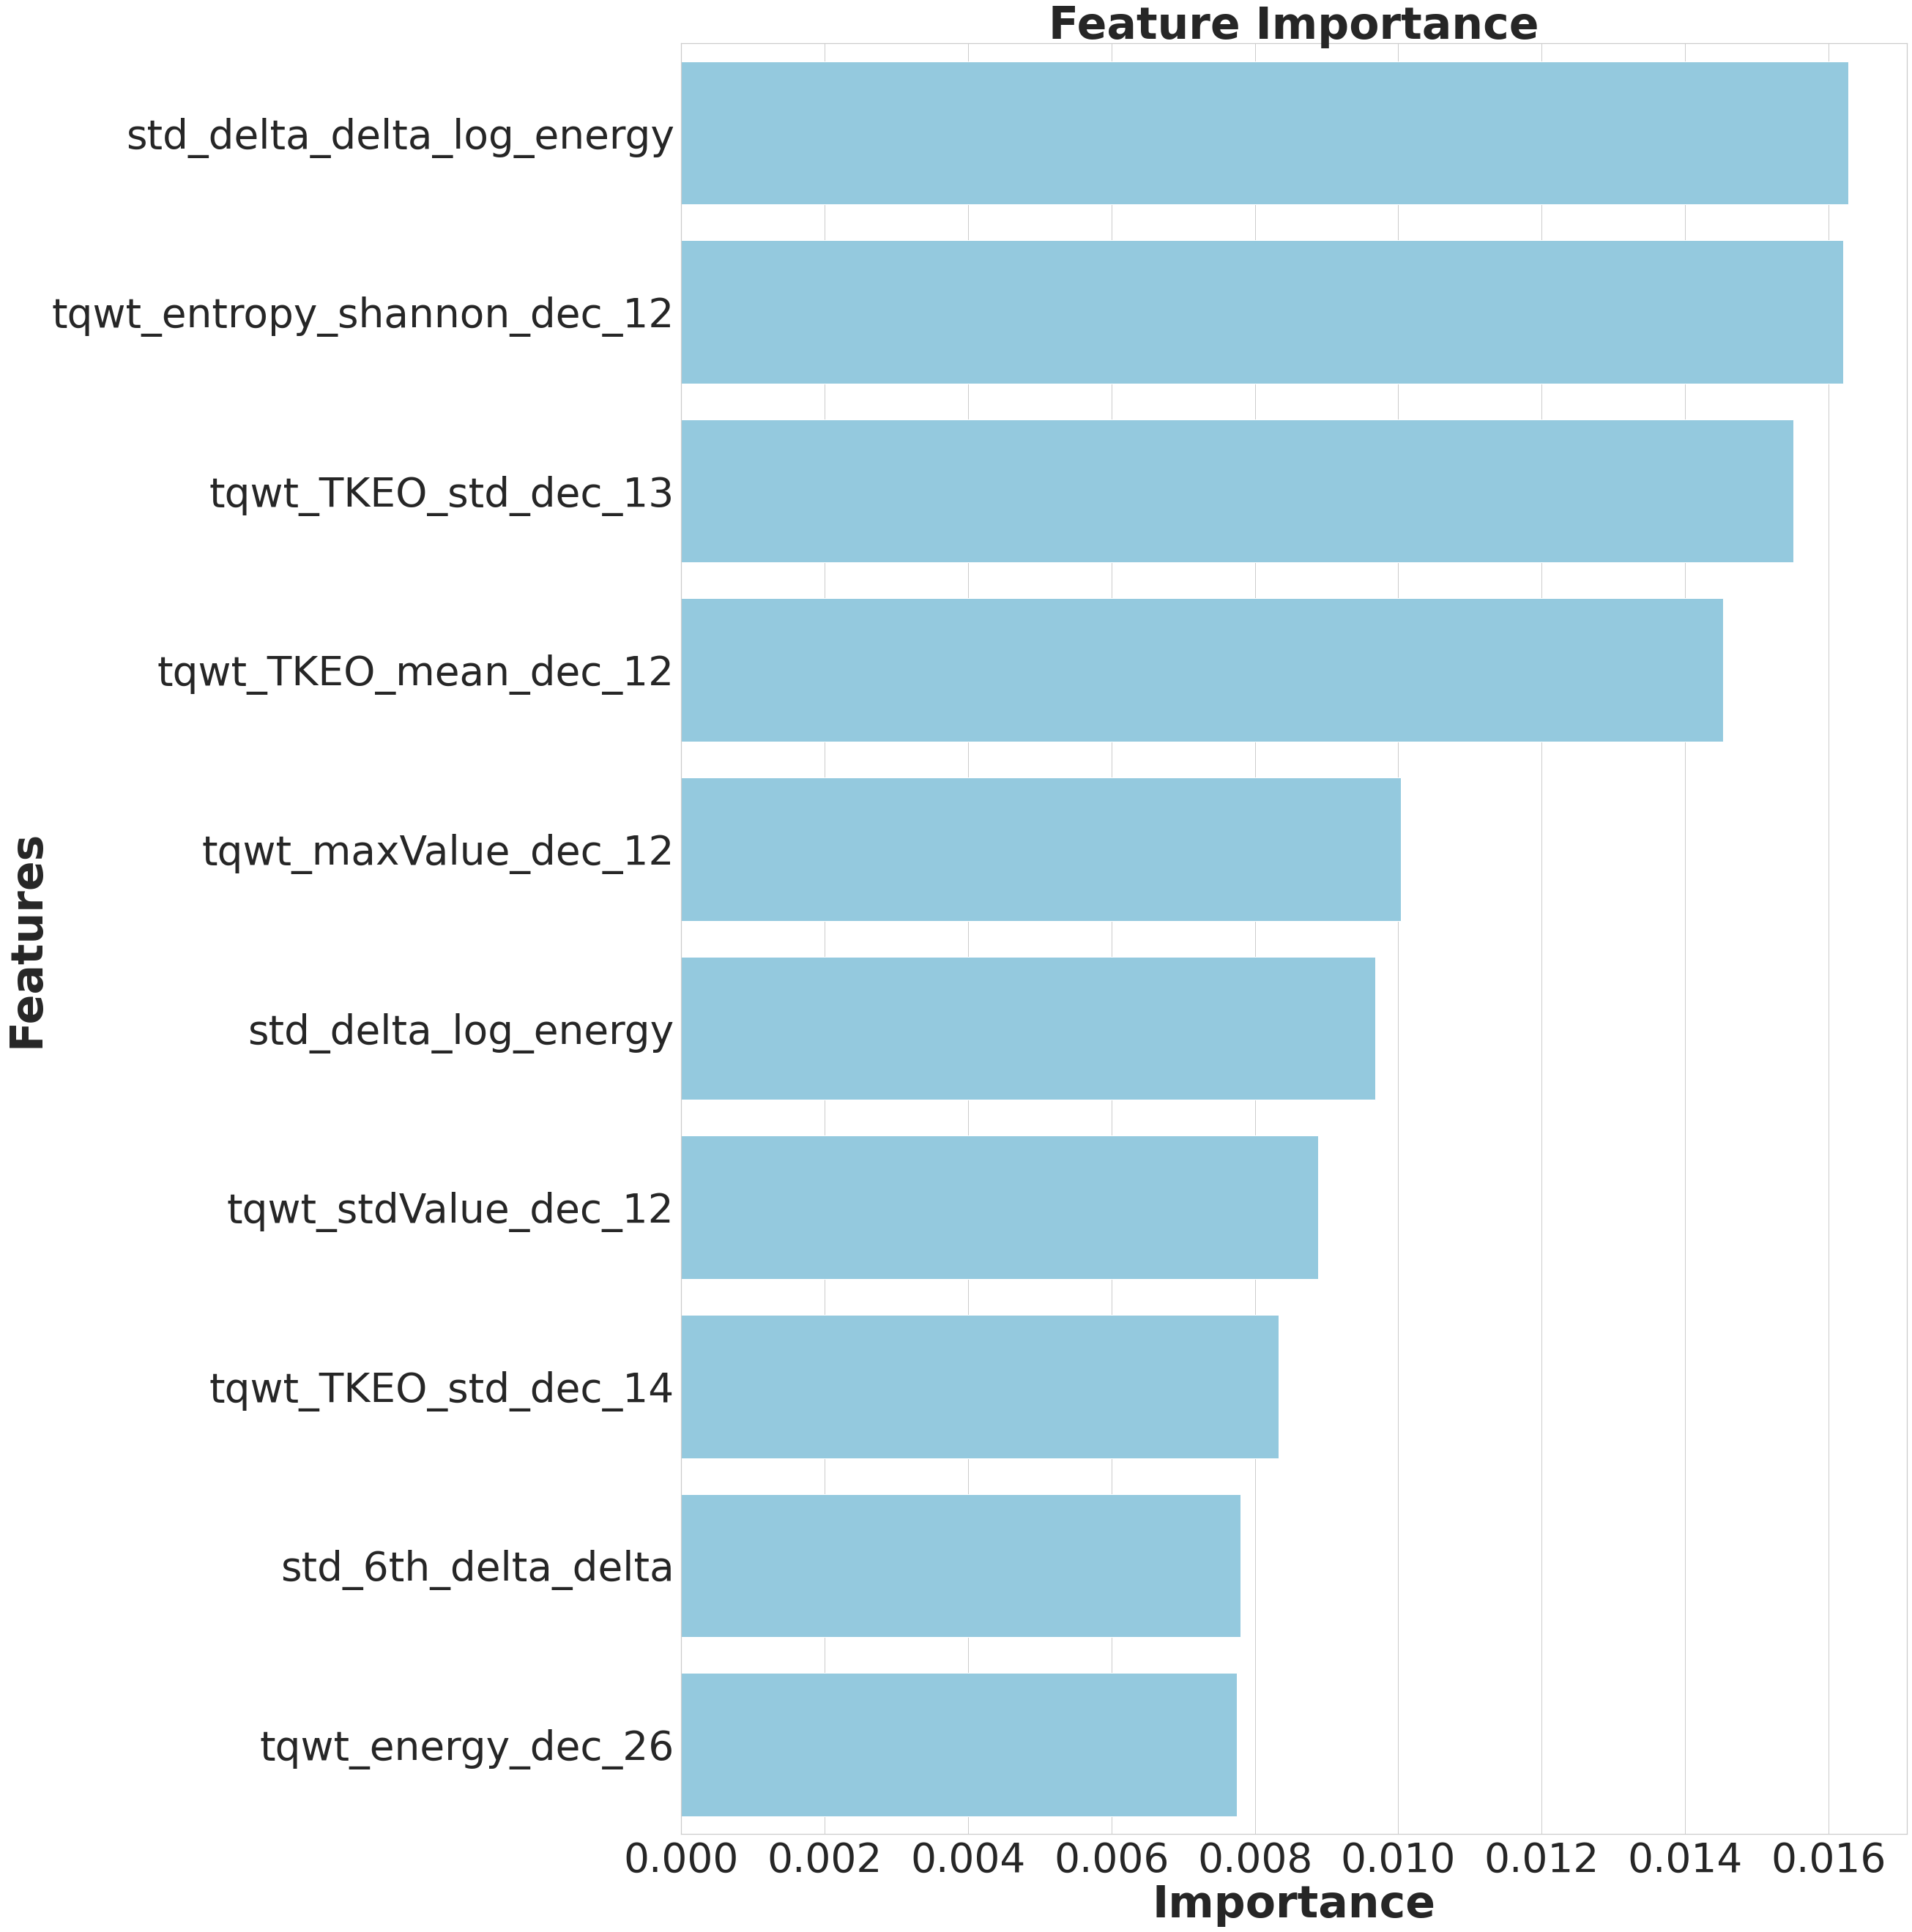

None

,Features,Gini-Importance
0,std_delta_delta_log_energy,0.016278
1,tqwt_entropy_shannon_dec_12,0.016204
2,tqwt_TKEO_std_dec_13,0.015505
3,tqwt_TKEO_mean_dec_12,0.014524
4,tqwt_maxValue_dec_12,0.010037
5,std_delta_log_energy,0.009676
6,tqwt_stdValue_dec_12,0.008882
7,tqwt_TKEO_std_dec_14,0.008327
8,std_6th_delta_delta,0.007796
9,tqwt_energy_dec_26,0.007747


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False).head(10)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 5)
fig, ax = plt.subplots()
fig.set_size_inches(30,45)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=60, weight = 'bold')
plt.ylabel('Features', fontsize=60, weight = 'bold')
plt.title('Feature Importance', fontsize=60, weight = 'bold')
display(plt.show())
display(importances)

PCA

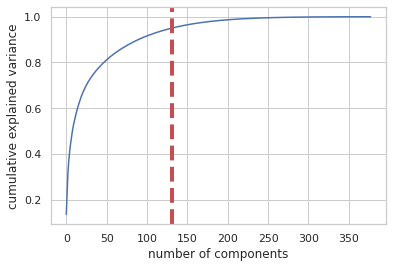

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.135126,0.135126
1,0.227931,0.092806
2,0.316451,0.088520
3,0.366336,0.049885
4,0.404771,0.038435
5,0.436454,0.031683
6,0.462683,0.026230
7,0.486749,0.024066
8,0.509202,0.022453
9,0.528075,0.018873


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca_test = PCA(n_components=378)
pca_test.fit(X_train_scaled)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=131, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(140))
pd.set_option('display.max_rows', None)

In [ ]:
pca = PCA(n_components=131)
pca.fit(X_train_scaled)

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

FIT TO BASELINE RANDOM FOREST MODEL AFTER PCA

In [ ]:
rfc1 = RandomForestClassifier()
rfc1.fit(X_train_scaled_pca, y_train)
display(rfc1.score(X_train_scaled_pca, y_train))

1.0

PERFORMANCE EVALUATION

In [ ]:
y_pred = rfc.predict(X_test_scaled)
y_pred_pca = rfc1.predict(X_test_scaled_pca)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])

conf_matrix_baseline_pca = pd.DataFrame(confusion_matrix(y_test, y_pred_pca), index = ['actual 0', 'actual 1'], 
                                        columns = ['predicted 0', 'predicted 1'])

display(conf_matrix_baseline)
print('Baseline Random Forest Evaluation Score')
print('Precision : ', precision_score(y_test, y_pred))
print('Recall : ', recall_score(y_test, y_pred))
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('F1-Score : ', f1_score(y_test, y_pred))

display(conf_matrix_baseline_pca)
print('Baseline Random Forest With PCA')
print('Precision : ', precision_score(y_test, y_pred_pca))
print('Recall : ', recall_score(y_test, y_pred_pca))
print('Accuracy : ', accuracy_score(y_test, y_pred_pca))
print('F1-Score : ', f1_score(y_test, y_pred_pca))

,predicted 0,predicted 1
actual 0,56,40
actual 1,12,270


Baseline Random Forest Evaluation Score
Precision :  0.8709677419354839
Recall :  0.9574468085106383
Accuracy :  0.8624338624338624
F1-Score :  0.9121621621621622


,predicted 0,predicted 1
actual 0,18,78
actual 1,3,279


Baseline Random Forest With PCA
Precision :  0.7815126050420168
Recall :  0.9893617021276596
Accuracy :  0.7857142857142857
F1-Score :  0.8732394366197184
